#Projeto de Aprendizado de Máquina - Classificação

O objetivo deste projeto é classificar se os clientes vão aderir ou não ao investimento oferecido pelo banco com base em algumas características deles selecionadas, como saldo, estado civil, idade, grau de escolaridade etc.

##Sobre a base de dados

A base traz dados de clientes de uma instituição financeira, como idade, grau de escolaridade, se é inadimplenente ou não, se fez empréstimo ou não, além de duas variáveis que informam quantidade de vezes em que a instituição entrou em contato com o cliente e o tempo decorrido desde o último contato. A variável target desta base de dados, **aderencia_investimento**, informa se o cliente fez ou não o investimento proposto pela instituição.

#Análise exploratória dos dados

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
dados = pd.read_csv("/content/drive/MyDrive/Alura/Machine Learning - Classificação/marketing_investimento.csv")
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


###Aplicando o método info(), podemos conhecer um pouco mais os dados, por exemplo, descobrir se todas as variáveis têm o tipo adequado de dados e se há dados nulos.

In [3]:
display(dados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


None

###Não há dados nulos para serem tratados.
###Agora vamos explorar o comportamento dos dados de cada variável para conhecer um pouco mais a nossa base de dados.

##Explorando as variáveis categóricas

In [4]:
dados.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [5]:
categoricas = ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo','aderencia_investimento'] #separando as variáveis categóricas
for coluna in categoricas:
  fig = px.histogram(dados, x = coluna, text_auto = True)
  fig.show()


###Com base nesta avaliação gráfica, percebemos que não há inconsistências nas categorias das variáveis (por exemplo, não apareceu nenhuma categoria que não faça sentido). Além disso, agora sabemos a quantidade de dados de cada classe das variáveis, inclusive da target, e podemos ver que esta variável não está desbalanceada.
###Agora, vamos avaliar como cada variável categória se relaciona com a variável-alvo.

In [6]:
for coluna in categoricas[0:4]:
  fig = px.histogram(dados, x = coluna, text_auto =True, color = 'aderencia_investimento', barmode = 'group')
  fig.show()

###Observando os gráficos, percebemos que há alguns dados desbalanceados: por exemplo, entre as pessoas casadas, há uma diferença significativa no grau de aderência, indicando que a maior parte delas não adere ao investimento. O mesmo acontece com as pessoas com ensino médio e as com ensino fundamental, assim como os não inadimplentes e os indivíduos que fizeram ou não empréstimo.

##Explorando as variáveis numéricas

###Para esta análise, vamos usar os boxplots, que nos apresenta a distribuição dos dados em cada variável. Utilizando esse gráfico, poderemos identificar os valores mínimos e máximo, a mediana e se há outliers, por exemplo.

In [7]:
numericas = ['idade', 'saldo','tempo_ult_contato', 'numero_contatos']
for coluna in numericas:
  fig = px.box(dados, x = coluna, color = 'aderencia_investimento')
  fig.show()

###Como feito na análise das variáveis categóricas, os gráficos nos mostram que não há inconsistências nas categorias de cada variável numérica. Por exemplo, não há idades menores que 18 anos (que não poderiam realizar investimentos) nem humanamente impossíveis, como valores negativos ou muito altos.

#Primeiros passos para a construção do algoritmo de classificação

In [8]:
x = dados.drop(columns = 'aderencia_investimento') #separação das variáveis explicativas
y = dados['aderencia_investimento'] #separação da variável target

documentação da biblioteca scikit-learn: https://scikit-learn.org/stable/index.html

###Como os dados de algumas variáveis categóricas são textuais, vamos precisar tratá-los para que se tornem compreensíveis para o modelo de ML. Para isso, vamos utilizar a técnica **one hot enconding**, com o método OneHotEncoder da biblioteca scikit-learn.

###* Tratamento das variáveis explicativas

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
colunas = x.columns #guardando as variáveis explicativas na variável "coluna"

In [11]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['estado_civil', 'escolaridade', 'fez_emprestimo', 'inadimplencia']),
                                  remainder = 'passthrough', sparse_threshold = 0)

In [12]:
#fazendo a transformação nas variáveis explicativas
x = one_hot.fit_transform(x)

In [13]:
#visualizando o nome das colunas criadas depois do processo de one hot encoding
one_hot.get_feature_names_out(colunas)



array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__fez_emprestimo_sim',
       'onehotencoder__inadimplencia_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

###Obs: As colunas que receberam "remainder" no início do nome foram as que não sofreram alteração. Definimos essa ação no parâmetro "remainder = 'passthrough'".

###Após esse processo, foi gerado um array. Então vamos transformar nossos dados novamente para o formato dataframe.

In [14]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__fez_emprestimo_sim,onehotencoder__inadimplencia_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


###* Tratamento da variável target

In [15]:
#importando o método da biblioteca Scikit-Learn para fazer a transformação da variável alvo categórica para valores numéricos
from sklearn.preprocessing import LabelEncoder

In [16]:
#criando um objeto do tipo label enconder
label_encoder = LabelEncoder()

In [17]:
y = label_encoder.fit_transform(y)

In [18]:
y

array([1, 1, 0, ..., 1, 1, 1])

#Construindo os modelos de aprendizado de máquina

###Agora que todos os dados foram tratados e estão adequados para o modelo de aprendizado de máquina, vamos separar o conjunto de dados de treinamento (para que o algoritmo compreenda os padrões) e o conjunto de teste (para verificar o desempenho do modelo ao classificar os dados).

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

###Primeiro, vamos gerar um modelo de base, utilizando o método. Este modelo inicial vai estabelecer um desempenho mínimo, que um modelo mais complexo obrigatoriamente deverá superar.

In [21]:
from sklearn.dummy import DummyClassifier #importando o método para criar o modelo dummy (modelo base)

dummy = DummyClassifier()
dummy.fit(x_treino, y_treino) #ajusta o modelo aos dados
dummy.score(x_teste, y_teste) #mostra a taxa de acerto do modelo (no caso, 60%)

0.6025236593059937

###Agora, vamos treinar os dados com um modelo mais complexo, de árvore de decisão.

##Primeiro modelo de aprendizado de máquina: árvore de decisão

In [22]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [23]:
arvore.predict(x_teste) #o modelo, já treinado com o conjunto de dados para o treinamento, vai fazer a previsão das respostas usando os dados das variáveis explicativas separados para o teste.


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [24]:
arvore.score(x_teste, y_teste)

0.6593059936908517

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [26]:
#renomeando as colunas criadas pelo one hot enconding para nomes mais explicativos
nome_colunas = ['casado(a)', 'divorciado(a)', 'solteiro(a)', 'fundamental',
                'medio', 'superior', 'inadimplencia', 'fez_emprestimo', 'idade',
                'saldo', 'tempo_ult_contato', 'numero_contatos']

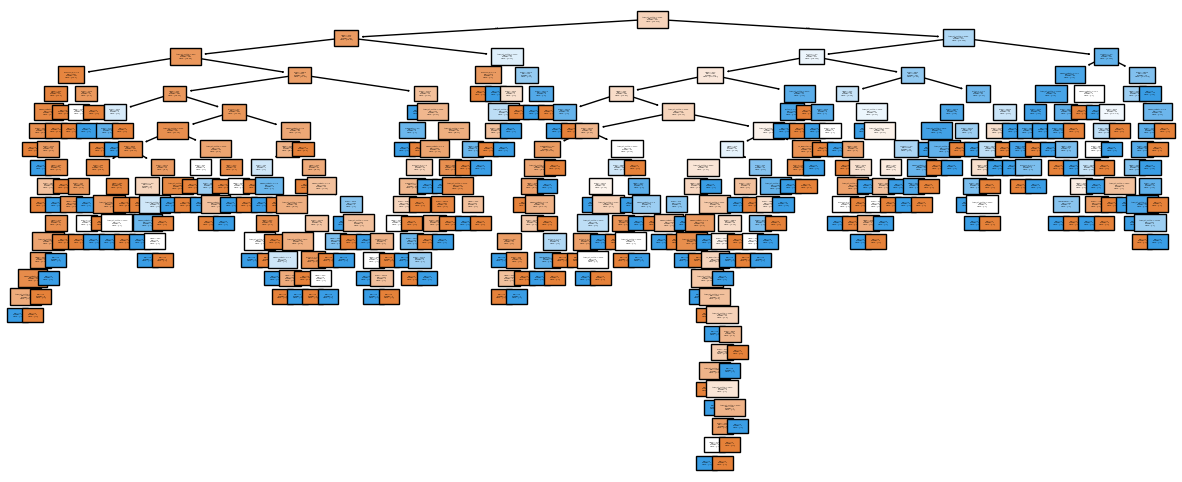

In [27]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True, fontsize = 1, feature_names = nome_colunas);

###Pela imagem da árvore de decisão plotada, observamos que o modelo está extremamente completo e possivelmente está "aprendendo" até os ruídos dos dados e se comportando de forma nem um pouco generalista. Para ajustar esse erro, vamos "podar" árvore, ou seja, reduzir a quantidade de vezes em que os grupos são divididos.

In [28]:
arvore = DecisionTreeClassifier(random_state = 5, max_depth = 3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [29]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [30]:
arvore.score(x_teste, y_teste)

0.7160883280757098

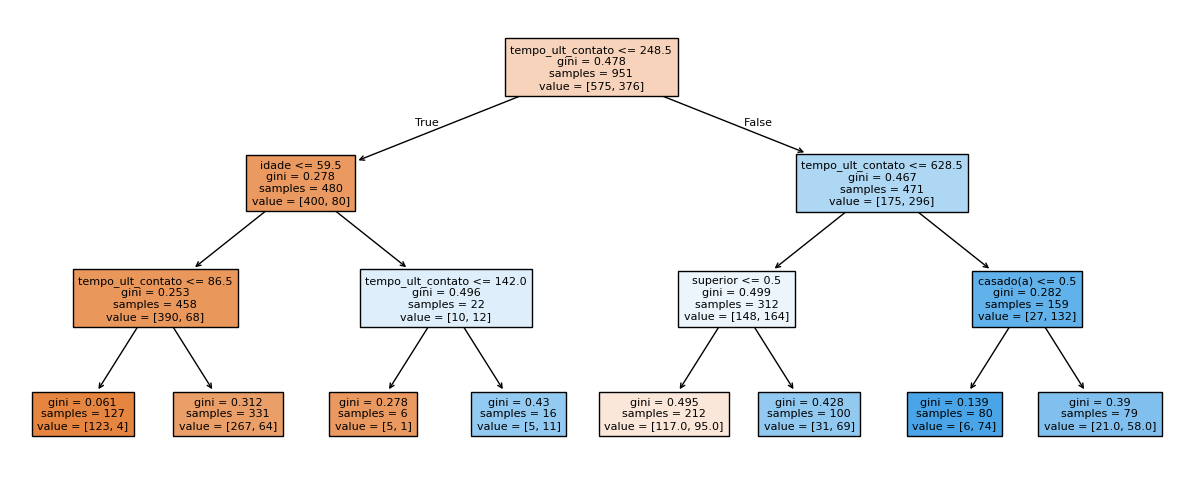

In [31]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True, fontsize = 8, feature_names = nome_colunas);

###Depois da "poda", observamos que score deste modelo aumentou, indicando que ele se tornou mais eficiente.

##Segundo modelo de aprendizado de máquina: KNN

###Como na nossa base de dados há dados em escalas muito diferentes (por exemplo, os dados da variável *idade* está numa escala muito menos em comparação com os da variável *salário*), vamos precizar tratá-los fazendo uma **normalização**. Para isso, usamos o método **MinMaxScaler** da biblioteca scikit-learn. Ao normalizar os dados, evitamos que a diferença de escala das variáveis interfira no modelo, garantindo que todas elas tenham o mesmo impacto nele.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
normalizacao = MinMaxScaler()

In [34]:
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [35]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.176471,0.042810,0.023878,0.000000


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(x_treino_normalizado, y_treino)
x_teste_normalizado = normalizacao.transform(x_teste)

In [39]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

###Analisando a acurácia dos 2 modelos construídos, percebemos que o modelo de árvore de decisão apresenta o melhor desempenho neste caso.

In [40]:
print(f'Acurácia do modelo de árvore de decisão: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia do modelo KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia do modelo de árvore de decisão: 0.7160883280757098
Acurácia do modelo KNN: 0.6876971608832808


##Já temos um modelo vencedor, mas como utilizá-lo fora do ambiente do Colab? Para isso, podemos exportá-lo utilizando o módulo Pickle e armazená-lo em arquivos serializados (ou seja, convertidos de objetos Python em uma representação binária que pode ser armazenada em um arquivo).

In [41]:
import pickle

In [42]:
#vamos salvar em um arquivo as transformações feitas nos dados (neste caso, one hot enconding), porque esse processo precisa ser aplicado em qualquer dado que for inserido no modelo de árvore
with open('modelo_one_hot_enconding.pkl', 'wb') as arquivo: #abrindo um arquivo do tipo byte
  pickle.dump(one_hot, arquivo) #o método dump armazena no arquivo o modelo "one_hot"

#vamos salvar o modelo de árvore criado anteriormente
with open('modelo_arvore.pkl', 'wb') as arquivo:
          pickle.dump(arvore, arquivo)

##Testando com novos dados

In [45]:
novos_dados = {'idade':[31], 'estado_civil':['solteiro (a)'], 'escolaridade': ['superior'],
               'inadimplencia':['nao'], 'saldo':[20000], 'fez_emprestimo':['sim'], 'tempo_ult_contato':[800], 'numero_contatos':[3]}

In [46]:
novos_dados = pd.DataFrame(novos_dados)
novos_dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,31,solteiro (a),superior,nao,20000,sim,800,3


In [48]:
#fazendo a leitura dos arquivos com os modelos
modelo_one_hot = pd.read_pickle('/content/modelo_one_hot_enconding.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [50]:
#fazendo a transformação dos novos dados
novos_dados_transformados = modelo_one_hot.transform(novos_dados)

In [52]:
#usando o método predict para fazer a previsão utilizando os novos dados
modelo_arvore.predict(novos_dados_transformados)

array([1])

###De acordo com o modelo de árvore, este novo cliente aderiria ao investimento oferecido pelo banco.